In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog


In [7]:


def nash_equlibrium(a):
    m, n = a.shape # размерность матрицы а

    # минимизируем c @ x
    # при условии A_ub @ x <= b_ub
    # так как в 1 случае нужен другой знак неравенства(linprog умеет только в <=)
    # то берем A и b с минусом и получаем, что для 1ого игрока максимизируем выигрыш
    c = np.ones((m,))
    b_ub = -np.ones((n,))
    a_T = -np.transpose(a)
    res1 = linprog(c, A_ub=a_T, b_ub=b_ub)
    v = 1.0 / res1.fun # изначальное неравенство >= V, но в задаче лин. прогр. решаем для >= 1,поэтому делим
    p = res1.x
    p = v * p

    c2 = -np.ones((n,))
    b_ub2 = np.ones((m,))
    res2 = linprog(c2, A_ub=a, b_ub=b_ub2)
    q = res2.x
    q = v * q
    return v, p, q

In [27]:

def visualization(p,n):
    x = np.linspace(1, len(p), len(p) )
    if n == 1:
        plt.title("Стратегия первого игрока")
    else:
        plt.title("Стратегия второго игрока")
    plt.axis([0, len(p) + 1, 0, max(p) + 1/2]) 
    plt.stem(x, p, use_line_collection=True, basefmt=' ')
    plt.show()

### Чистая стратегия


Цена игры равна  4.999999999847558


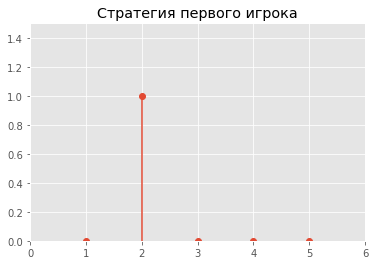

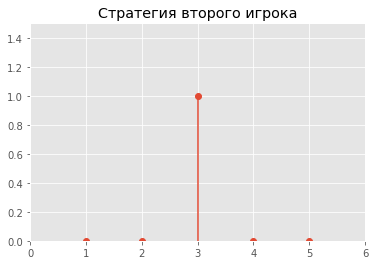

In [33]:
a = np.array([[3, 9, 2, 1, 1], 
[7, 8, 5, 6, 8], 
[4, 7, 3, 5, 7], 
[5, 6, 1, 7, 7],
[6, 7, 1, 4, 5]])
v, p, q = nash_equlibrium(a)
print("Цена игры равна ", v)
visualization(p,1)
visualization(q,2)

Цена игры равна  3.999999942585153


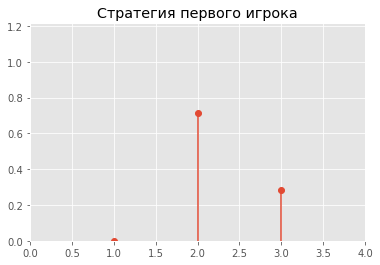

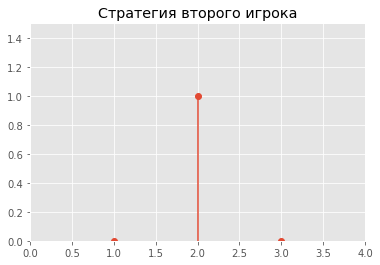

In [34]:
a = np.array([[1,2,3], 
[5,4,6], 
[8,4,3]])
v, p, q = nash_equlibrium(a)
print("Цена игры равна ", v)
visualization(p,1)
visualization(q,2)

### Неполный спектр - некоторые стратегии не используются

Цена игры равна  1.4999999999979416


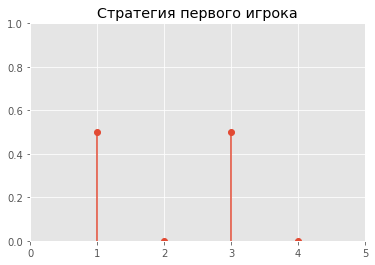

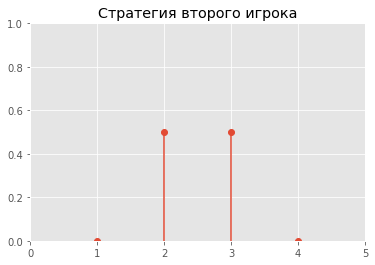

In [35]:
a = np.array([[2, 1, 2, 3], 
    [3, 1.5, 1, 2], 
    [2, 2, 1, 1],
    [1, 1, 1, 0.5]]) 
v, p, q = nash_equlibrium(a)
print("Цена игры равна ", v)
visualization(p,1)
visualization(q,2)

### Полный спектр - все стратегии используются


Цена игры равна  2.4999999996807114


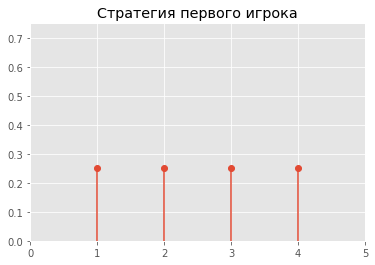

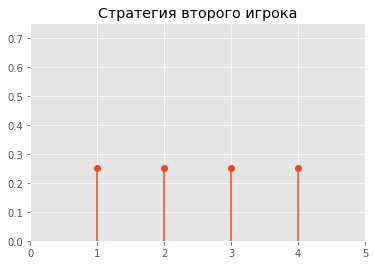

In [37]:
a = np.array([[1, 2, 3, 4], 
              [2, 3, 4, 1],
              [3, 4, 1, 2], 
              [4, 1, 2, 3]])
v, p, q = nash_equlibrium(a)
print("Цена игры равна ", v)
visualization(p,1)
visualization(q,2)


Цена игры равна  1.999999999698379


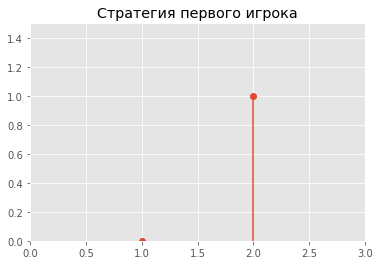

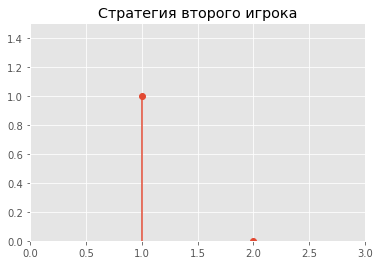

In [39]:
a = np.array([[1, 5],
              [2, 4]])
v, p, q = nash_equlibrium(a)
print("Цена игры равна ", v)
visualization(p,1)
visualization(q,2)
